In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv("UberDataset.csv")

In [71]:
df

START_DATE          END_DATE  CATEGORY             START  \
0     01-01-2016 21:11  01-01-2016 21:17  Business       Fort Pierce   
1     01-02-2016 01:25  01-02-2016 01:37  Business       Fort Pierce   
2     01-02-2016 20:25  01-02-2016 20:38  Business       Fort Pierce   
3     01-05-2016 17:31  01-05-2016 17:45  Business       Fort Pierce   
4     01-06-2016 14:42  01-06-2016 15:49  Business       Fort Pierce   
...                ...               ...       ...               ...   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                  STOP    MILES          PURPOSE  
0          Fort Pierce      5.1   Meal/Entertain  
1          Fort Pierce      5.0              NaN  
2          Fort Pierce      4.8  Errand/Supplies  
3          Fort Pierce      4.7          Meeting  
4      West Palm Beach     63.7   Customer Visit  
...                ...      ...              ...  
1151  Unknown Location      3.9   Temporary Site  
1152  Unknown Location     16.2          Meeting  
1153           Gampaha      6.4   Temporary Site  
1154         Ilukwatta     48.2   Temporary Site  
1155               NaN  12204.7              NaN  

[1156 rows x 7 columns]

In [72]:
df.head(10)

START_DATE          END_DATE  CATEGORY            START  \
0  01-01-2016 21:11  01-01-2016 21:17  Business      Fort Pierce   
1  01-02-2016 01:25  01-02-2016 01:37  Business      Fort Pierce   
2  01-02-2016 20:25  01-02-2016 20:38  Business      Fort Pierce   
3  01-05-2016 17:31  01-05-2016 17:45  Business      Fort Pierce   
4  01-06-2016 14:42  01-06-2016 15:49  Business      Fort Pierce   
5  01-06-2016 17:15  01-06-2016 17:19  Business  West Palm Beach   
6  01-06-2016 17:30  01-06-2016 17:35  Business  West Palm Beach   
7  01-07-2016 13:27  01-07-2016 13:33  Business             Cary   
8  01-10-2016 08:05  01-10-2016 08:25  Business             Cary   
9  01-10-2016 12:17  01-10-2016 12:44  Business          Jamaica   

              STOP  MILES          PURPOSE  
0      Fort Pierce    5.1   Meal/Entertain  
1      Fort Pierce    5.0              NaN  
2      Fort Pierce    4.8  Errand/Supplies  
3      Fort Pierce    4.7          Meeting  
4  West Palm Beach   63.7   Customer Visit  
5  West Palm Beach    4.3   Meal/Entertain  
6       Palm Beach    7.1          Meeting  
7             Cary    0.8          Meeting  
8      Morrisville    8.3          Meeting  
9         New York   16.5   Customer Visit

In [73]:
df.shape

(1156, 7)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Preprocessing

In [75]:
df.fillna({"PURPOSE" : "NOT"}, inplace=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     1156 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [77]:
df.head(10)

START_DATE          END_DATE  CATEGORY            START  \
0  01-01-2016 21:11  01-01-2016 21:17  Business      Fort Pierce   
1  01-02-2016 01:25  01-02-2016 01:37  Business      Fort Pierce   
2  01-02-2016 20:25  01-02-2016 20:38  Business      Fort Pierce   
3  01-05-2016 17:31  01-05-2016 17:45  Business      Fort Pierce   
4  01-06-2016 14:42  01-06-2016 15:49  Business      Fort Pierce   
5  01-06-2016 17:15  01-06-2016 17:19  Business  West Palm Beach   
6  01-06-2016 17:30  01-06-2016 17:35  Business  West Palm Beach   
7  01-07-2016 13:27  01-07-2016 13:33  Business             Cary   
8  01-10-2016 08:05  01-10-2016 08:25  Business             Cary   
9  01-10-2016 12:17  01-10-2016 12:44  Business          Jamaica   

              STOP  MILES          PURPOSE  
0      Fort Pierce    5.1   Meal/Entertain  
1      Fort Pierce    5.0              NOT  
2      Fort Pierce    4.8  Errand/Supplies  
3      Fort Pierce    4.7          Meeting  
4  West Palm Beach   63.7   Customer Visit  
5  West Palm Beach    4.3   Meal/Entertain  
6       Palm Beach    7.1          Meeting  
7             Cary    0.8          Meeting  
8      Morrisville    8.3          Meeting  
9         New York   16.5   Customer Visit

In [78]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors = 'coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors = 'coerce')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [82]:
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_DATE']).hour

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
 7   date        421 non-null    object        
 8   time        421 non-null    float64       
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 81.4+ KB


In [84]:
df.head()

START_DATE            END_DATE  CATEGORY        START  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business  Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business  Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business  Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business  Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business  Fort Pierce   

              STOP  MILES          PURPOSE        date  time  
0      Fort Pierce    5.1   Meal/Entertain  2016-01-01  21.0  
1      Fort Pierce    5.0              NOT  2016-01-02   1.0  
2      Fort Pierce    4.8  Errand/Supplies  2016-01-02  20.0  
3      Fort Pierce    4.7          Meeting  2016-01-05  17.0  
4  West Palm Beach   63.7   Customer Visit  2016-01-06  14.0

In [85]:
df['day-night'] = pd.cut(x = df['time'], bins = [0,10,15,19,24], labels = ['Morning', 'Afternoon', 'Evening', 'Night'])

In [86]:
df.head()

START_DATE            END_DATE  CATEGORY        START  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business  Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business  Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business  Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business  Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business  Fort Pierce   

              STOP  MILES          PURPOSE        date  time  day-night  
0      Fort Pierce    5.1   Meal/Entertain  2016-01-01  21.0      Night  
1      Fort Pierce    5.0              NOT  2016-01-02   1.0    Morning  
2      Fort Pierce    4.8  Errand/Supplies  2016-01-02  20.0      Night  
3      Fort Pierce    4.7          Meeting  2016-01-05  17.0    Evening  
4  West Palm Beach   63.7   Customer Visit  2016-01-06  14.0  Afternoon

In [87]:
df.dropna(inplace = True)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 413 entries, 0 to 1047
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  413 non-null    datetime64[ns]
 1   END_DATE    413 non-null    datetime64[ns]
 2   CATEGORY    413 non-null    object        
 3   START       413 non-null    object        
 4   STOP        413 non-null    object        
 5   MILES       413 non-null    float64       
 6   PURPOSE     413 non-null    object        
 7   date        413 non-null    object        
 8   time        413 non-null    float64       
 9   day-night   413 non-null    category      
dtypes: category(1), datetime64[ns](2), float64(2), object(5)
memory usage: 32.9+ KB


In [89]:
df.shape

(413, 10)

# In Which Category do people book the most rides?

<Axes: xlabel='count', ylabel='CATEGORY'>

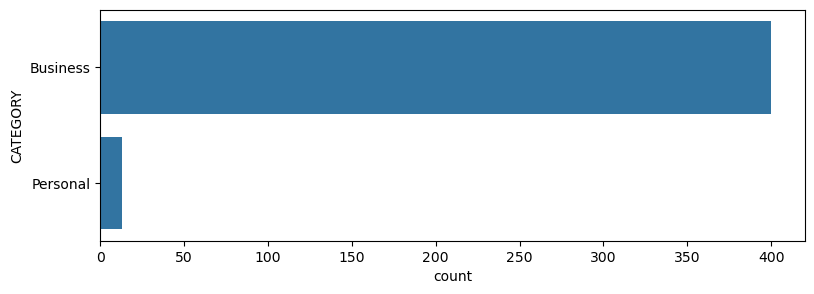

In [90]:
plt.figure(figsize = (20,3))
plt.subplot(1,2,1)
sns.countplot(df['CATEGORY'])

# For what purpose do people book the most rides?

<Axes: xlabel='count', ylabel='PURPOSE'>

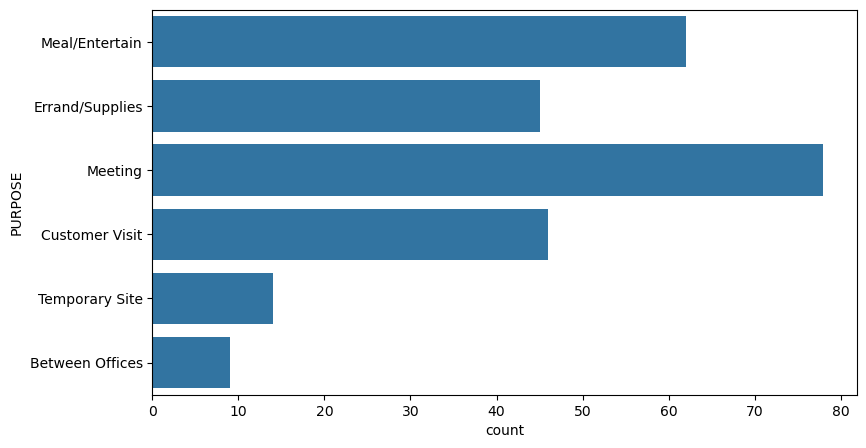

In [91]:
# First Remove the Blanks Spaces which are NOT
df = df[df['PURPOSE'] != "NOT"]

# Plotting after filtering
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(df['PURPOSE'])

# At what time do people book most cabs?

<Axes: xlabel='count', ylabel='day-night'>

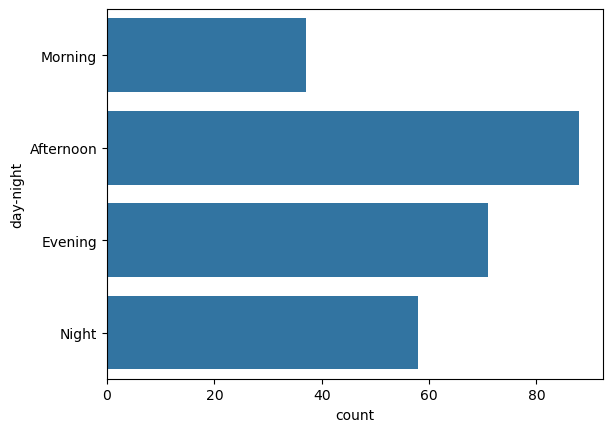

In [92]:
sns.countplot(df["day-night"])

# In which month do people book rides less frequently

In [94]:
# Ensure START_DATE is a datetime object
df.loc[:, 'START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')

# Extract the month from START_DATE
df.loc[:, 'MONTH'] = df['START_DATE'].dt.month

# Get value counts for months (1 to 12)
mon = df['MONTH'].value_counts(sort=False)

In [95]:
df.head(5)

START_DATE            END_DATE  CATEGORY            START  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business      Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business      Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business      Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business      Fort Pierce   
5 2016-01-06 17:15:00 2016-01-06 17:19:00  Business  West Palm Beach   

              STOP  MILES          PURPOSE        date  time  day-night  MONTH  
0      Fort Pierce    5.1   Meal/Entertain  2016-01-01  21.0      Night      1  
2      Fort Pierce    4.8  Errand/Supplies  2016-01-02  20.0      Night      1  
3      Fort Pierce    4.7          Meeting  2016-01-05  17.0    Evening      1  
4  West Palm Beach   63.7   Customer Visit  2016-01-06  14.0  Afternoon      1  
5  West Palm Beach    4.3   Meal/Entertain  2016-01-06  17.0    Evening      1

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

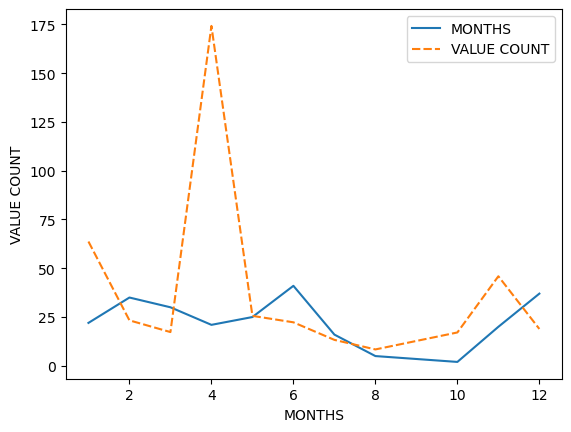

In [96]:
df = pd.DataFrame({"MONTHS" : mon.values, "VALUE COUNT" : df.groupby("MONTH", sort = False)['MILES'].max()})
ax = sns.lineplot(data = df)
ax.set(xlabel = "MONTHS", ylabel = "VALUE COUNT")